# Discovering New Music with Spotify Using Machine Learning
## Introduction
In this notebook we are going to be visualizing data from Spotify's New Music Friday using the k-means clustering algorithm along with principal component analysis (PCA) for dimensionality reduction. We will also be using the elbow method for determing the best value for k.

### Setup dependencies

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

### Read in our data from CSV file
We will also remove the track ID column and save it for later

In [27]:
returned_data = pd.read_csv('new_music_friday.csv')
track_id_column = returned_data['track_id']
returned_data = returned_data.drop('track_id', 1)

### Scale data

In [28]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(returned_data))

### Find optimal k
We need to decide which value of k we want to use, which will determine the number of clusters our model will have. We can do this by using the elbow method. The optimal k value is around where the "elbow" of the graph is - this case we will use k = 5.

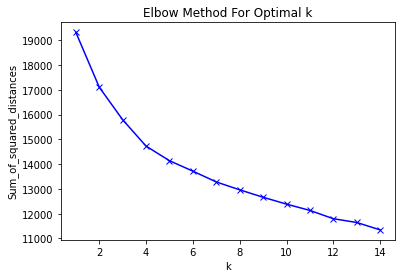

In [29]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [30]:
k = 5

In [31]:
# build clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)
scaled_data["clusters"] = clusters

# visualize
plotX = pd.DataFrame(np.array(scaled_data))
plotX.columns = scaled_data.columns

pca_1d = PCA(n_components=1)
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["clusters"], axis=1)))
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["clusters"], axis=1)))
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["clusters"], axis=1)))

PCs_1d.columns = ["PC1_1d"]
PCs_2d.columns = ["PC1_2d", "PC2_2d",]
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')
plotX["dummy"] = 0

cluster0 = plotX[plotX["clusters"] == 0]
cluster1 = plotX[plotX["clusters"] == 1]
cluster2 = plotX[plotX["clusters"] == 2]
cluster3 = plotX[plotX["clusters"] == 3]
cluster4 = plotX[plotX["clusters"] == 4]

init_notebook_mode(connected=True)

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster3["PC1_1d"],
                    y = cluster3["dummy"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(255, 0, 200, 0.8)'),
                    text = None)

#trace5 is for 'Cluster 4'
trace5 = go.Scatter(
                    x = cluster4["PC1_1d"],
                    y = cluster4["dummy"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
            xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
            yaxis= dict(title= '',ticklen= 5,zeroline= False)
            )

fig = dict(data = data, layout = layout)

iplot(fig)

In [32]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster3["PC1_2d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(255, 0, 200, 0.8)'),
                    text = None)

#trace5 is for 'Cluster 4'
trace5 = go.Scatter(
                    x = cluster4["PC1_2d"],
                    y = cluster4["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [33]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace4 is for 'Cluster 3'
trace4 = go.Scatter3d(
                    x = cluster3["PC1_3d"],
                    y = cluster3["PC2_3d"],
                    z = cluster3["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(255, 0, 200, 0.8)'),
                    text = None)

#trace5 is for 'Cluster 4'
trace5 = go.Scatter3d(
                    x = cluster4["PC1_3d"],
                    y = cluster4["PC2_3d"],
                    z = cluster4["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)